# Gradient Descent

Se verá como funciona el algoritmo de Gradiente Descendiente aplicado a una regresión logística (softmax, en realidad). Esta regresión asignará probabilidades de ser un High-Frequency-Trader (HFT).

<img src='gd.jpeg' height='300'>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(legacy=125)

## Carga de datos


In [2]:
df = pd.read_csv('pruebas_datos.csv')

In [3]:
df

,OTR,OCR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,...,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,NbSecondWithAtLeatOneTrade,type
0,-0.264140,-0.171596,-0.034334,0.173848,-0.051861,-0.194635,-0.103174,-0.493894,0.669772,0.113391,...,0.446317,0.159271,-0.989267,-0.459192,0.414463,-0.068166,2.257305,0.215650,-0.430203,1
1,-0.267371,0.071957,-0.034334,-0.394632,-0.051861,-0.261262,-0.107967,-0.578826,-0.714095,0.478099,...,0.341803,0.053125,-0.989267,0.065955,2.493944,-0.174906,-0.259542,-0.257432,-0.415533,1
2,-0.268571,0.392193,-0.034334,-0.596358,-0.051861,-0.261262,-0.107967,-0.579091,-0.864277,0.449648,...,-0.843156,-0.601191,-0.989267,0.223500,1.925729,-0.174906,-0.350248,-0.257432,-0.351515,1
3,-0.267320,-0.082373,-0.034334,-0.337735,-0.051861,-0.260286,-0.107966,-0.574153,0.401915,-0.240214,...,0.205183,-0.085628,-0.989267,-0.406677,1.394323,-0.174906,-0.056171,-0.257431,-0.430203,1
4,-0.268375,0.094866,-0.034334,-0.551568,-0.051861,-0.261262,-0.107967,-0.579396,-0.876131,-0.003950,...,0.447088,0.160054,-0.989267,0.170985,1.041917,-0.174906,-0.327099,-0.257432,-0.384858,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50577,-0.270438,0.040609,-0.034334,-0.587633,-0.051861,-0.261262,-0.107967,-0.579589,-0.811629,-0.928057,...,-0.499086,-0.800893,-0.989267,-0.039074,2.972986,-0.174905,-0.139995,-0.257431,-0.431537,1
50578,-0.269299,0.040609,-0.034334,-0.704571,-0.051861,-0.261262,-0.107967,-0.573424,-0.873859,-1.356834,...,-0.927494,-1.235990,-0.989267,-0.616736,0.204493,-0.174905,-0.355996,-0.257262,-0.426202,1
50579,-0.270456,0.952123,-0.034334,-0.592510,-0.051861,-0.261262,-0.107967,-0.579500,-0.894274,0.012924,...,0.464365,0.177600,-0.989267,0.276014,1.680116,-0.174905,-0.076802,-0.256689,-0.414199,1
50580,-0.270274,2.659404,-0.034334,-0.648742,-0.051861,-0.261262,-0.107967,-0.579477,-0.886564,-0.241991,...,0.203363,-0.087476,-0.989267,0.748647,1.846925,-0.174905,-0.275480,-0.257133,-0.388859,1


In [4]:
# Los valores 1 son NON-HFT y los 0 son HFT
df.type.value_counts()

type
0    30522
1    20060
Name: count, dtype: int64

In [7]:
df.shape

(50582, 26)


Los datos fueron utilizados en una competencia que pueden consultar [aquí](https://challengedata.ens.fr/participants/challenges/50/).

Es de gran interés tratar de estudiar el impacto que tienen los HFT en los mercados, ya que lo que hacen es realizar intercambios dando ordenes de intercambio a un mecanismo llamado Limit Order Book (LOB), al cual le ordenan realizar compras o ventas a precios que ellos deseen.

#### Diccionario de datos



1. NbTradeVenueMic (23) : Número de centros de negociación en los que opera el jugador del mercado

De todos los centros de negociación, estadísticas sobre el número de operaciones observadas por segundo

2. MaxNbTradesBySecond (24)
3. MeanNbTradesBySecond (25)

Estadísticas sobre el delta de tiempo observado entre dos operaciones en la plataforma de negociación TV_1[1]:

4. min_dt_TV1 (26)
5. med_dt_TV1 (28)
6. mean_dt_TV1 (27)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_2:

7. min_dt_TV1_TV2 (29)
8. med_dt_TV1_TV2 (31)
9. mean_dt_TV1_TV2 (30)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_3:

10. min_dt_TV1_TV3 (32)
11. med_dt_TV1_TV3 (34)
12. mean_dt_TV1_TV3 (33)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_4 :

13. min_dt_TV1_TV4 (35)
14. med_dt_TV1_TV4 (37)
15. mean_dt_TV1_TV4(36)

De todos los centros de negociación, número de segundos durante el día de negociación donde se observa al menos una operación del jugador del mercado i

16. NbSecondWithAtLeatOneTrade(38)

En la plataforma de negociación TV_1, tres proporciones entre el número de todo tipo de eventos[2] enviados a la LOB y:

17. el número de operaciones (OTR) (4)
18. el número de eventos de tipo cancelación (OCR) (5)
19. el número de eventos de tipo de modificación (OMR) (6)

En el centro de negociación TV_1, estadísticas durante el delta de tiempo observado entre dos eventos de todo tipo enviados:

20. min_time_two_events (7)
21. mean_time_two_events (8)
22. 10_p_time_two_events (9)
23. med_time_two_events (10)
24. 25_p_time_two_events (11)
25. 75_p_time_two_events (12)
26. 90_p_time_two_events (13)
27. max_time_two_events (14)

En la plataforma de negociación TV_1, estadísticas a lo largo de la vida útil observada de las órdenes canceladas:

28. min_lifetime_cancel (15)
29. mean_lifetime_cancel (16)
30. 10_p_lifetime_cancel (17)
31. med_lifetime_cancel (18)
32. 25_p_lifetime_cancel (19)
33. 75_p_lifetime_cancel (20)
34. 90_p_lifetime_cancel (21)
35. max_lifetime_cancel (22)

Extra variables

36. Type: HF, Non HFT (39)
37. Day
38. Share
39. Trader
40. Index

## Regresión lineal vs. regresión logística

**Regresión Lineal**
$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n + \epsilon
$$

**Regresión logística**
$$
\frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n)}}
$$
note la función sigmoide:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

<img src='lrlr.png'>

In [5]:
X_prob = np.array(df.drop(['type'], axis=1))
X_prob

array([[-0.26413997, -0.17159563, -0.03433358, ...,  2.25730527,
         0.21564981, -0.43020348],
       [-0.26737141,  0.07195718, -0.03433358, ..., -0.25954205,
        -0.25743172, -0.41553282],
       [-0.26857105,  0.39219296, -0.03433358, ..., -0.35024783,
        -0.25743176, -0.35151541],
       ...,
       [-0.27045626,  0.9521233 , -0.03433358, ..., -0.07680184,
        -0.25668942, -0.41419912],
       [-0.27027382,  2.65940442, -0.03433358, ..., -0.27547952,
        -0.25713323, -0.3888589 ],
       [-0.2702773 ,  0.66275362, -0.03433358, ...,  0.28933079,
        -0.25311955, -0.423535  ]])

In [6]:
X_prob.shape

(50582, 25)

In [7]:
Y_prob = np.array(df['type'])
Y_prob

array([1, 1, 1, ..., 1, 1, 1])

In [8]:
Y_prob.shape

(50582,)

In [9]:
num_inputs = 25
num_outputs = 2

W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [10]:
print(W)
print(B)

[[-0.08400075 -0.02064972]
 [ 0.13524204 -0.03956967]
 [-0.07461321  0.02229592]
 [ 0.17761585 -0.10635687]
 [-0.08400589  0.0277731 ]
 [-0.02204329  0.02089238]
 [ 0.01416012  0.05541595]
 [ 0.01297323 -0.04231165]
 [-0.06729369 -0.05734633]
 [-0.22384171 -0.13162099]
 [ 0.18203782  0.12593531]
 [ 0.05405428  0.04456667]
 [ 0.07500393 -0.08992801]
 [ 0.05678476 -0.13546022]
 [-0.17074971  0.01171912]
 [-0.02769348  0.04112305]
 [-0.09281582 -0.0684631 ]
 [-0.00462511 -0.22234836]
 [ 0.05840956 -0.09925124]
 [-0.03262413  0.07340556]
 [ 0.06198691 -0.26265141]
 [ 0.04500348  0.05202561]
 [-0.01743194 -0.02181816]
 [-0.05048849  0.00669088]
 [ 0.00813274  0.06027373]]
[0. 0.]


## Regresión softmax
La función softmax generaliza a la función sigmoide.

Antes, notemos que dado un arreglo de numpy, nosotros podemos realizar sumas de diferentes formas utilizando el método "sum()".

Si no pasamos ningún parámetro a "sum()", lo que obtendremos será la suma de todas las entradas de nuestra matriz (o arreglo o tensor).

Si damos como parámetro el "0", lo que nos regresará será la suma por columnas (es decir, en el eje 0)

Si damos como parámetro el "1", nos regresará la suma por filas (es decir, en el eje 1)

In [11]:
X = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X

array([[1., 2., 3.],
       [4., 5., 6.]])

In [12]:
X.sum(keepdims=True), X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(array([[21.]]),
 array([[5., 7., 9.]]),
 array([[ 6.],
        [15.]]))

Con esto podemos implementar de modo vectorizado la función softmax:

1. Obtenemos la exponencial evaluada en cada uno de nuestros elementos
2. Tomamos la suma de los elementos de su fila y normalizamos

La expresión matemática de la función SoftMax es la siguiente:


$$ \mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}. $$

In [18]:
def softmax(X):
    X_exp = np.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

Veamos un ejemplo con la matriz de 2X3 creada anteriormente.

In [14]:
# Supongamos que tenemos 4 clases
W_p_X = np.random.normal(0, 0.1, (3, 4)) # Jugaremos con este parametro
B_p_X = np.zeros(4) # Jugaremos con este parametro

W_p_X, B_p_X

(array([[ 0.15904813,  0.15383779,  0.02624004, -0.0477585 ],
        [-0.04351622,  0.0592601 ,  0.13946836, -0.07899897],
        [-0.00635907,  0.02248948, -0.02752244, -0.07568251]]),
 array([0., 0., 0., 0.]))

In [15]:
X @ W_p_X + B_p_X

array([[ 0.05293847,  0.33982642,  0.22260943, -0.43280397],
       [ 0.38045699,  1.04658852,  0.63716729, -1.0401239 ]])

In [16]:
softmax(X @ W_p_X + B_p_X)

array([[0.24198837, 0.32239503, 0.28673562, 0.14888098],
       [0.22316765, 0.43443868, 0.28848225, 0.05391142]])

Si observamos con cuidado, podemos ver que con esta operación estamos transformando todas nuestras entradas en números positivos. Mas aún, cada fila suma 1, es decir, la convertimos en una distribución de probabilidad.

In [17]:
x_prob = softmax(X @ W_p_X + B_p_X)
x_prob, x_prob.sum(1)

(array([[0.24198837, 0.32239503, 0.28673562, 0.14888098],
        [0.22316765, 0.43443868, 0.28848225, 0.05391142]]),
 array([1., 1.]))

### Softmax estable

In [ ]:
# Softmax Estable
def stable_softmax(X):
    X_exp = np.exp(X - np.max(X, axis=1, keepdims=True))
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition


prueba = np.array([[99999, 99995, 99993],[9, 5, 3]])

/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_14862/406658106.py:3: RuntimeWarning: overflow encountered in exp
  X_exp = np.exp(X)
/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_14862/406658106.py:5: RuntimeWarning: invalid value encountered in divide
  return X_exp / partition


array([[0.97962921, 0.01794253, 0.00242826],
       [0.97962921, 0.01794253, 0.00242826]])

In [50]:
softmax(prueba)

/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_14862/406658106.py:3: RuntimeWarning: overflow encountered in exp
  X_exp = np.exp(X)
/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_14862/406658106.py:5: RuntimeWarning: invalid value encountered in divide
  return X_exp / partition


array([[       nan,        nan,        nan],
       [0.97962921, 0.01794253, 0.00242826]])

In [51]:

stable_softmax(prueba)

array([[0.97962921, 0.01794253, 0.00242826],
       [0.97962921, 0.01794253, 0.00242826]])

## Definiendo el modelo

Implementemos una regresión softmax.

In [ ]:
def net(X, W, b):
    return softmax(np.dot(X.reshape((-1, W.shape[0])), W) + b)

def net_s(X,W,b):
    return stable_softmax(np.dot(X.reshape((-1, W.shape[0])), W) + b)

## Función de pérdida

Usaremos la función Cross-Entropy, una de las más populares para problemas de clasficación.

La función, para una sola observación, es la siguiente:
$$ -\sum_{c=1}^My_{c}\log(p_{c}), $$

donde $M$ es la cantidad de clases que tenemos, $log$ la función de logaritmo natural, $y$ es $0$ o $1$ dependiendo de la etiqueta real de la clase $c$ y por último $p_{c}$ es la probabilidad predicha de que la observación pertenezca a la clase $c$.

Para calcular esto, en lugar de utilizar un ciclo "for", utilizaremos funciones de numpy.

In [ ]:
def cross_entropy(y_hat, y):
    return np.sum( - np.log(y_hat[range(len(y_hat)), y]) ) / y.shape[0]

In [ ]:
y = np.array([0, 
              2])

y_hat = np.array([[0.1, 0.3, 0.6], 
                  [0.3, 0.2, 0.5]])

y_hat[[0, 1], y]

array([0.1, 0.5])

In [25]:
cross_entropy(y_hat, y)

1.4978661367769954

## Precisión de la clasificación

Este es un problema de clasificación multi-clase, es decir, un problema en el que observemos varias caracteristicas de un elemento y decidamos a que clase pertenece dicho elemento.

Por ejemplo: Un algoritmo de clasificación de imagenes que intente saber si algo es un perro, un gato o un ratón. Si introdujeramos características y al final diera un vector $(0.2, 0.38, 0.42)$, el algoritmo lo clasificaría como un ratón (lo marcaría como perteneciente a la tercer clase)

Cuando las predicciones son consistentes con las etiquetas verdaderas, decimos que son correctas. La precisión de la clasificación son la cantidad de predicciones correctas entre todas las predicciones. Sin embargo, es muy difícil optimizar esto directamente (pues no es una función diferenciable), pero será útil para ver el rendimiento de nuestro modelo.

Lo que hacemos para ver la precisión es encontrar el valor mas grande en el vector de probabilidades, convertirlo en entero (porque muy probablemente sea un valor entr 0 y 1) y compararlo con las etiquetas verdaderas de nuestros datos.

In [28]:
# ARGMAX regresa la posicion del elemento con mayor valor
np.array([[0.2,0.38, 0.42]]).argmax(axis=1)

array([2])

In [35]:
def accuracy(y_hat, y):
    """Calcula la cantidad de predicciones correctas."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.astype(y.dtype) == y
    return float(cmp.sum())/ len(y)

In [36]:
accuracy(y_hat, y)

0.5

### Accuracy en nuestro modelo con pesos al azar

In [37]:
X_prob

array([[-0.26413997, -0.17159563, -0.03433358, ...,  2.25730527,
         0.21564981, -0.43020348],
       [-0.26737141,  0.07195718, -0.03433358, ..., -0.25954205,
        -0.25743172, -0.41553282],
       [-0.26857105,  0.39219296, -0.03433358, ..., -0.35024783,
        -0.25743176, -0.35151541],
       ...,
       [-0.27045626,  0.9521233 , -0.03433358, ..., -0.07680184,
        -0.25668942, -0.41419912],
       [-0.27027382,  2.65940442, -0.03433358, ..., -0.27547952,
        -0.25713323, -0.3888589 ],
       [-0.2702773 ,  0.66275362, -0.03433358, ...,  0.28933079,
        -0.25311955, -0.423535  ]])

In [38]:
accuracy(net(X_prob, W, B), Y_prob)

0.3657625242181013

In [39]:
W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [40]:
# Las probabilidades que predecimos para cada fila de nuestros datos
net(X_prob, W, B)

array([[0.4740627 , 0.5259373 ],
       [0.49729998, 0.50270002],
       [0.5045218 , 0.4954782 ],
       ...,
       [0.26841303, 0.73158697],
       [0.27150191, 0.72849809],
       [0.51902496, 0.48097504]])

In [41]:
# La etiqueta verdadera de nuestros datos
Y_prob

array([1, 1, 1, ..., 1, 1, 1])

## Descenso por gradiente

In [96]:
def grad_for_w(X, y_true, w, b):
    pred = net_s(X,w,b)

    ones_true_class = np.zeros_like(pred) # Matriz de ceros que tiene la forma de las probabilidades

    ones_true_class[np.arange(len(pred)), y_true] = 1 # Genera 1 si está en la clasificacion correcta

    aux = pred - ones_true_class

    return X.T @ aux / X.shape[0]

In [98]:
def grad_for_b(X, y_true, w, b):
    pred = net_s(X,w,b)

    ones_true_class = np.zeros_like(pred) # Matriz de ceros que tiene la forma de las probabilidades (logits.shape), si alimento todos los datos es 50000X2

    ones_true_class[np.arange(len(pred)),y_true] = 1 # Genera 1 si está en la clasificacion correcta

    aux = pred - ones_true_class

    return aux.sum(axis=0, keepdims=True) / X.shape[0]

Ahora podemos implementar Gradient Descent

In [99]:
def gradient_descent(x, y, w, b, learning_rate=0.1, num_epochs=10):
	# La función de pérdida suele ser denotada por J(.)
	J_all = []

	for _ in range(num_epochs):
		y_probs = net_s(x, w, b)

		gradient_w = grad_for_w(x,y,w,b)
		gradient_b = grad_for_b(x,y,w,b)

	    # Actualización de los parámetros
		w = w - (learning_rate) * gradient_w
		b = b - (learning_rate) * gradient_b

		J_all.append(cross_entropy(y_probs, y))

	return J_all, w, b

In [92]:
W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [93]:
learning_rate = 0.01
num_epochs = 1000

In [100]:
J_all, W, B = gradient_descent(X_prob, Y_prob, W, B, learning_rate, num_epochs)
Y_hat = net(X_prob, W, B)
J = cross_entropy(Y_hat, Y_prob)
print("Cost: ", J)
print("Parameters: ", W)
print("Intercepto: ", B)

Cost:  0.2464365586816072
Parameters:  [[ 1.96005646e-01 -3.46928454e-01]
 [-4.08977106e-02  8.27483170e-02]
 [-1.36267426e-01 -1.13378033e-01]
 [-1.65002548e-02  7.80961451e-02]
 [-4.87635005e-04  1.33974078e-01]
 [-6.37403586e-02 -9.09092291e-02]
 [-1.05106413e-01  2.88225539e-02]
 [ 2.75014201e-01 -5.85666814e-02]
 [-7.88505688e-02  1.54750855e-01]
 [-3.82915878e-01  4.65450325e-01]
 [-2.56983338e-01 -1.57424084e-02]
 [-1.82452853e-01 -3.78341329e-03]
 [-9.22179301e-02  4.97159350e-02]
 [ 1.30060596e-01 -1.65974545e-01]
 [-9.41384215e-03 -7.45473412e-02]
 [ 1.23021712e-01  3.47896743e-02]
 [-1.75788953e-01  1.02818967e-01]
 [ 2.76078119e-02 -1.03011328e-01]
 [ 7.52897424e-01 -9.31205409e-01]
 [-9.73884900e-02  3.65046212e-02]
 [ 1.05536290e-01 -4.52742148e-03]
 [-2.42427825e-02 -1.85128608e-01]
 [-1.15927402e-01 -1.52168475e-02]
 [-7.06622655e-02 -6.73742313e-02]
 [ 1.96925053e-01 -5.50585783e-02]]
Intercepto:  [[ 0.4008851 -0.4008851]]


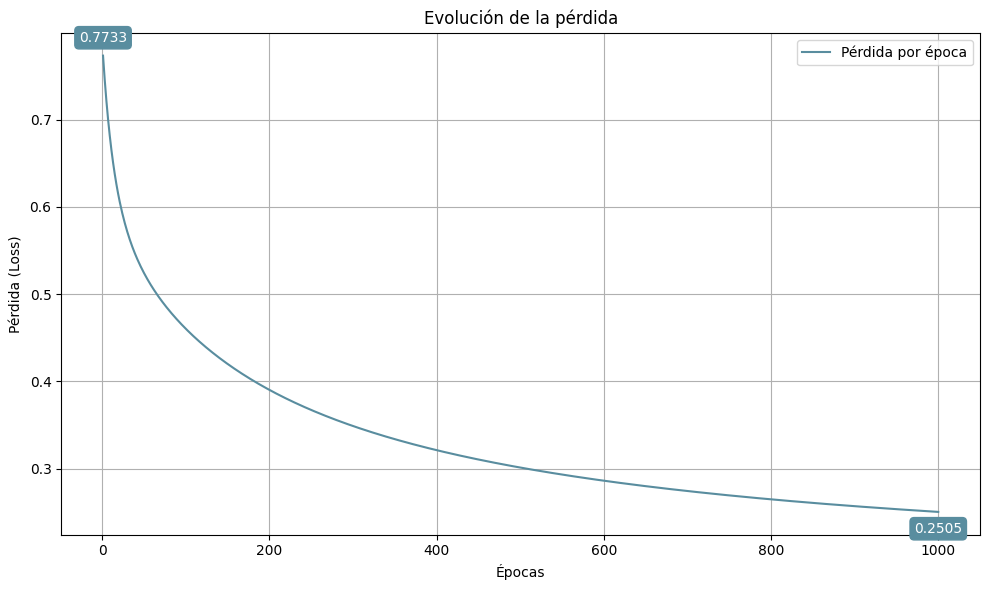

In [75]:
perdida_por_epoca = np.array(J_all)

# Flatten for plotting
y_vals = perdida_por_epoca.flatten()
x_vals = np.arange(1, len(y_vals) + 1)

# Choose a nice color
color = '#598D9F'

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color=color, label='Pérdida por época')

# Annotate first and last points
for i in [0, -1]:
    plt.annotate(f'{y_vals[i]:.4f}',
                 (x_vals[i], y_vals[i]),
                 textcoords="offset points",
                 xytext=(0, 10 if i == 0 else -15),
                 ha='center',
                 color='white',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor=color, facecolor=color))

# Decorate
plt.xlabel("Épocas")
plt.ylabel("Pérdida (Loss)")
plt.title("Evolución de la pérdida")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
accuracy(net(X_prob, W, B), Y_prob)

0.9148906725712704

## SGD: Stochastic Gradient Descent

En este caso, el algoritmo entrenara de modo un poco distinto, tomando muestras al azar de nuestros datos.

In [76]:
# Tamaño de la muestra o batch
batch_size = 200

In [ ]:
number_of_rows = X_prob.shape[0]
random_indices = np.random.choice(number_of_rows, size=batch_size, replace=False)
X_prima = X_prob[random_indices, :].copy()

In [78]:
X_prima

array([[-0.26566975, -0.17641846, -0.03433358, ...,  0.52178892,
         0.06356836, -0.43020348],
       [-0.07702932, -0.26101617, -0.03433358, ..., -0.35511923,
        -0.256903  , -0.25282189],
       [-0.10019879,  0.31551   , -0.03433354, ...,  0.38053917,
        -0.25743169, -0.43287087],
       ...,
       [-0.2460376 , -0.02691079, -0.03433358, ...,  0.40266186,
         0.17456634, -0.4222013 ],
       [-0.26196298, -0.06746192, -0.03433358, ..., -0.33588626,
        -0.22817909, -0.25815668],
       [ 0.00105668, -0.26218622, -0.03433358, ..., -0.28408008,
        -0.20050831, -0.35018171]])

In [79]:
Y_prima = Y_prob[random_indices].copy()

In [80]:
Y_prima

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0])

In [101]:
def batch_gradient_descent(x, y, w, b, batch_size, learning_rate=0.1, num_epochs=10):
  m = x.shape[0]
  J_all = []

  for _ in range(num_epochs):
    random_indices = np.random.choice(m, size=batch_size, replace=False)
    x_batch = x[random_indices, :].copy()
    y_batch = y[random_indices].copy()

    y_probs = net_s(x_batch, w, b)

    gradient_w = grad_for_w(x_batch,y_batch,w,b)
    gradient_b = grad_for_b(x_batch,y_batch,w,b)

    #Actualizamos los paramentros
    w = w - (learning_rate) * gradient_w
    b = b - (learning_rate) * gradient_b

    J_all.append(cross_entropy(y_probs, y_batch))

  return J_all, w, b

In [102]:
W = np.random.normal(0, 0.1, (num_inputs, num_outputs)) # Jugaremos con este parametro
B = np.zeros(num_outputs) # Jugaremos con este parametro

In [103]:
learning_rate = 0.01
num_epochs = 1000

In [104]:
J_all, W, B = batch_gradient_descent(X_prob, Y_prob, W, B, batch_size, learning_rate, num_epochs)
Y_hat = net(X_prob, W, B)
J = cross_entropy(Y_hat, Y_prob)
print("Cost: ", J)
print("Parameters: ", W)
print("Intercepto: ", B)

Cost:  0.24534072762125794
Parameters:  [[ 2.12239391e-01 -1.68000988e-01]
 [-3.34968429e-02  6.27398935e-02]
 [-1.05062871e-01  1.85402105e-01]
 [-1.88440235e-01 -1.82402050e-01]
 [-1.08548787e-01  7.14133937e-02]
 [ 2.15262262e-01  1.42575644e-01]
 [-5.40870058e-03  1.60211170e-01]
 [-7.36924361e-02 -2.19466135e-01]
 [-1.62253543e-01  3.49806451e-02]
 [-4.69941241e-01  3.14511652e-01]
 [-1.60488689e-01  2.49388920e-01]
 [-8.68786480e-02  2.95583971e-01]
 [ 4.21338942e-03 -7.05321824e-02]
 [ 1.57033397e-01 -1.78192806e-01]
 [-2.66579796e-02 -1.16226156e-01]
 [ 1.40248914e-01  1.65339210e-02]
 [-1.41231178e-01  4.70846050e-02]
 [ 2.52840495e-02 -4.05576403e-03]
 [ 8.79760085e-01 -9.25910952e-01]
 [-6.85827681e-02  2.56398167e-02]
 [ 5.57396164e-02 -1.37932718e-02]
 [ 2.09990805e-01 -4.20674594e-02]
 [-4.32195100e-02 -1.97709195e-02]
 [ 2.82422678e-04  1.49304038e-01]
 [ 1.22425431e-01  4.52830232e-02]]
Intercepto:  [[ 0.39427798 -0.39427798]]


In [105]:
print(J_all)

[0.5790262007673267, 0.5588964802792531, 0.5917058038962767, 0.5707412798742435, 0.6827852444191979, 0.5385853436852325, 0.6126615989605468, 0.5606507644846594, 0.5653831084159918, 0.5242150415716725, 0.5917503768383044, 0.5478748098164687, 0.5487259863369329, 0.5643244084403214, 0.5182058042163579, 0.5343702426088942, 0.5923693921535164, 0.5652917637343498, 0.5451388714917627, 0.6108245745838792, 0.5261117095385924, 0.5316927795716656, 0.5569042269034409, 0.4992287887920289, 0.5349111274255165, 0.471260510524384, 0.5584858906299872, 0.5133759945041628, 0.47697357479366154, 0.5409334991961938, 0.4544180559610935, 0.5157193387790217, 0.5550077174629736, 0.5000034248586097, 0.483530697645364, 0.5192553585322506, 0.4909506669580196, 0.5222368641540207, 0.47845014934747043, 0.4343979320309084, 0.5417556063139662, 0.4813019243304633, 0.5298844202039731, 0.48398114576861656, 0.48253789180896006, 0.573501506573536, 0.48360825133808005, 0.5472934168404857, 0.5467099548345365, 0.483699889047059

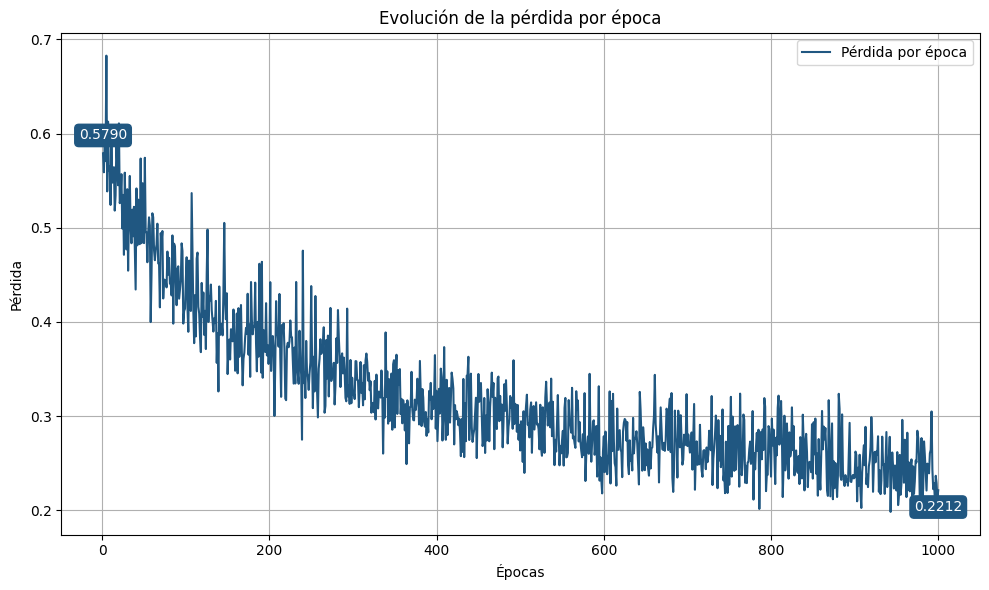

In [106]:
perdida_por_epoca = np.array(J_all)

# Define x and y values
y_vals = perdida_por_epoca
x_vals = np.arange(1, len(y_vals) + 1)

# Choose color
color = '#205781'

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color=color, label='Pérdida por época')

# Annotate first and last epochs
for i in [0, -1]:
    plt.annotate(f'{y_vals[i]:.4f}',
                 (x_vals[i], y_vals[i]),
                 textcoords="offset points",
                 xytext=(0, 10 if i == 0 else -15),
                 ha='center',
                 color='white',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor=color, facecolor=color))

# Labels and grid
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida por época")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [108]:
accuracy(net(X_prob, W, B),Y_prob)

0.9161954845597248